In [1]:
from sklearn import datasets
import numpy as np

## scikit-learn の活用例

In [2]:
# iris データの読み込み
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(f"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [3]:
# 訓練データとテストデータへの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
# 訓練データを用いた標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.mean(), X_train_std.std())
print(X_test_std.mean(), X_test_std.std())

1.0150610510858574e-16 0.9999999999999999
-0.024516396323407026 0.9616054315705168


## sklearn のパーセプトロンクラスによる学習と予測

In [5]:
# sklearn のパーセプトロンクラスによる学習
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print(f"Misclassified examples: {(y_test != y_pred).sum()}")

Perceptron(eta0=0.1, random_state=1)

In [7]:
from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Accuracy: {ppn.score(X_test_std, y_test):.3f}")

Accuracy: 0.978
Accuracy: 0.978


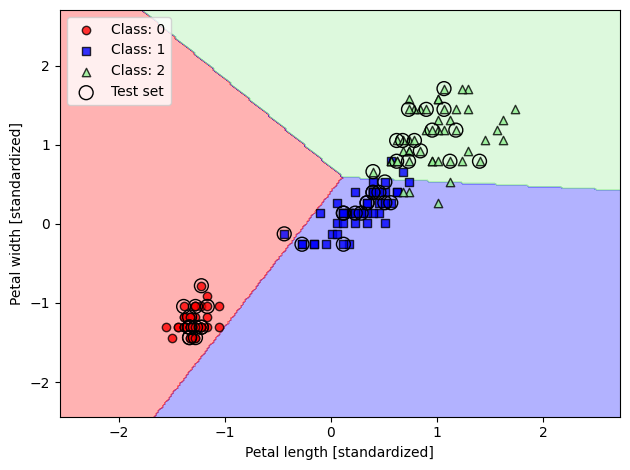

In [8]:
# 訓練データとテストデータの可視化
from study_pytorch.plot_util import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=ppn,
    test_idx=range(105, 150),
    x_label="Petal length [standardized]",
    y_label="Petal width [standardized]",
)

* 線形分離不可能なデータセットなので、誤分類が含まれる

## scikit-learn を使ってロジスティック回帰モデルを実装する

In [11]:
# sklearn のロジスティック回帰クラスによる学習
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="ovr")
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print(f"Misclassified examples: {(y_test != y_pred).sum()}")

Misclassified examples: 1


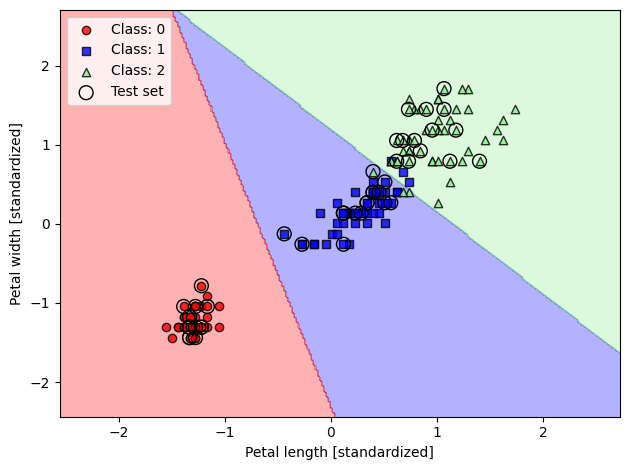

In [12]:
plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=lr,
    test_idx=range(105, 150),
    x_label="Petal length [standardized]",
    y_label="Petal width [standardized]",
)

## 線形SVM（サポートベクターマシン）による最大マージン分類

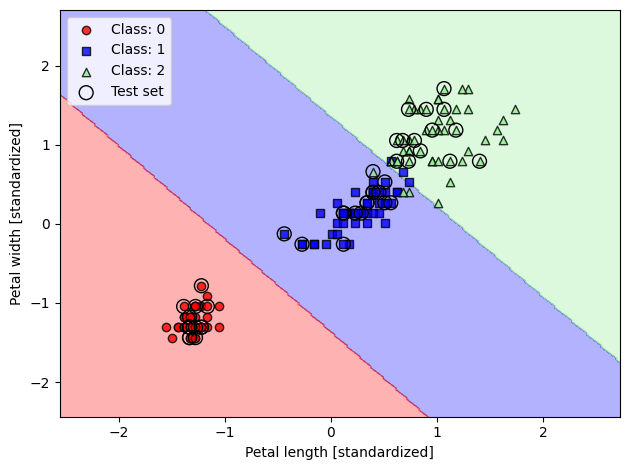

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=svm,
    test_idx=range(105, 150),
    x_label="Petal length [standardized]",
    y_label="Petal width [standardized]",
)

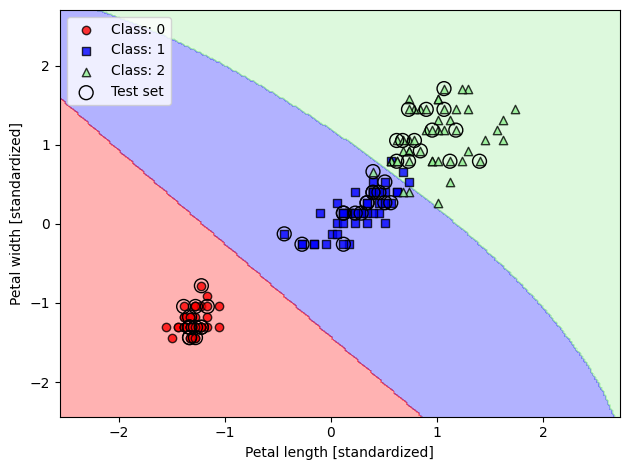

In [21]:
svm = SVC(kernel="rbf", C=10.0, gamma=0.1, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=svm,
    test_idx=range(105, 150),
    x_label="Petal length [standardized]",
    y_label="Petal width [standardized]",
)